In [77]:
#Task 2 Model selection
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split 

#Math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

#helpers

%matplotlib inline 
from sklearn.preprocessing import StandardScaler

# XGBoost

#from xgboost import XGBClassifier
#from xgboost import plot_tree

#Add graphviz for visualization
from io import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus



In [78]:
#read the input file created from previous processing and add dummy variables. The boolean is giving an error for cross_val_score
Credit1=pd.read_csv('C:/Deepa/UTAustin/Course2/CreditOne.csv',header=1)
Credit1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30203 non-null  int64 
 1   ID                          30202 non-null  object
 2   LIMIT_BAL                   30203 non-null  object
 3   SEX                         30203 non-null  object
 4   EDUCATION                   30203 non-null  object
 5   MARRIAGE                    30203 non-null  object
 6   AGE                         30203 non-null  object
 7   PAY_0                       30203 non-null  object
 8   PAY_2                       30203 non-null  object
 9   PAY_3                       30203 non-null  object
 10  PAY_4                       30203 non-null  object
 11  PAY_5                       30203 non-null  object
 12  PAY_6                       30203 non-null  object
 13  BILL_AMT1                   30203 non-null  ob

In [79]:
Credit2=Credit1.drop(Credit1.index[[201,202]])

In [80]:
Credit2.to_csv('C:/Deepa/UTAustin/Course2/CreditTwo_T2.csv',index=False)

In [81]:
Credit3= pd.read_csv('C:/Deepa/UTAustin/Course2/CreditTwo_T2.csv',header=0)

In [82]:
Credit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30201 non-null  int64 
 1   ID                          30201 non-null  int64 
 2   LIMIT_BAL                   30201 non-null  int64 
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  int64 
 6   AGE                         30201 non-null  int64 
 7   PAY_0                       30201 non-null  int64 
 8   PAY_2                       30201 non-null  int64 
 9   PAY_3                       30201 non-null  int64 
 10  PAY_4                       30201 non-null  int64 
 11  PAY_5                       30201 non-null  int64 
 12  PAY_6                       30201 non-null  int64 
 13  BILL_AMT1                   30201 non-null  in

In [83]:
Credit3 = pd.get_dummies(Credit3)

In [84]:
Credit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   0                                       30201 non-null  int64
 1   ID                                      30201 non-null  int64
 2   LIMIT_BAL                               30201 non-null  int64
 3   MARRIAGE                                30201 non-null  int64
 4   AGE                                     30201 non-null  int64
 5   PAY_0                                   30201 non-null  int64
 6   PAY_2                                   30201 non-null  int64
 7   PAY_3                                   30201 non-null  int64
 8   PAY_4                                   30201 non-null  int64
 9   PAY_5                                   30201 non-null  int64
 10  PAY_6                                   30201 non-null  int64
 11  BILL_AMT1      

In [85]:
#split the data for regression modelling
X = Credit3.iloc[:,3:23]
X.head()


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [86]:
y=Credit3['LIMIT_BAL']
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [87]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [88]:
#Modeling (Regression)
algoLRegression = LinearRegression()
reg_model = algoLRegression.fit(X_train,y_train)

In [89]:
#Predictions
preds = reg_model.predict(X_test)


In [90]:
#Regression scores
predRsquared = r2_score(y_test,preds)
rmse = sqrt(mean_squared_error(y_test, preds))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)


R Squared: 0.328
RMSE: 105355.741


In [91]:
#SVR - Support Vector Regression - rbf for Cross Validation
algoSVRRegression = SVR(kernel='rbf', C=1)
svr_model=algoSVRRegression.fit(X_train, y_train)
preds = svr_model.predict(X_test)
print (preds)

[140040.97003956 139804.32990332 140015.43605069 ... 140066.21268527
 139313.6582614  139960.79662047]


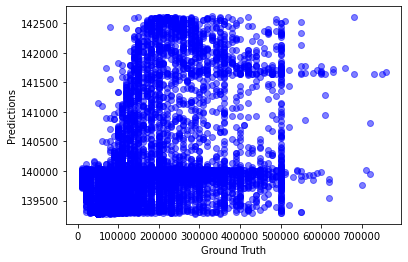

In [92]:
plt.scatter(y_test, preds, alpha = 0.5,color='blue')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [93]:
#Random Forest Regression
algoRForest = RandomForestRegressor(n_estimators=10,random_state=0) 
algoRForest.fit(X_train,y_train)
#Predictions
preds = algoRForest.predict(X_test)
preds

array([283000., 135000., 311000., ..., 170000.,  85000., 214000.])

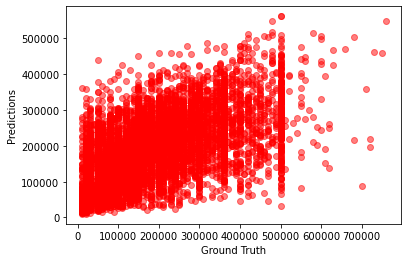

In [94]:
plt.scatter(y_test, preds, alpha = 0.5,color='red')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [95]:

algos_Class = []
algos_Class.append(('Random Forest Regressor',RandomForestRegressor()))
algos_Class.append(('Linear Regression',LinearRegression()))
algos_Class.append(('Support Vector Regression',SVR()))


In [96]:
#regression ---Error here  Classification metrics can't handle a mix of multiclass and continuous targets
#results = []
#names = []
#for name, model in algos_Class:
#    result = cross_val_score(model, X_train,y_train, cv=5, scoring='accuracy')
#    names.append(name)
#    results.append(result)

In [97]:
for i in range(len(names)):
    print(names[i],results[i].mean())

In [98]:
#classification with dependent variable -default/not default
#using the file with no dummy variables for this.
Credit4= pd.read_csv('C:/Deepa/UTAustin/Course2/CreditTwo.csv',header=0)

In [99]:
Credit4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   0                           30201 non-null  int64
 1   ID                          30201 non-null  int64
 2   LIMIT_BAL                   30201 non-null  int64
 3   SEX                         30201 non-null  int64
 4   EDUCATION                   30201 non-null  int64
 5   MARRIAGE                    30201 non-null  int64
 6   AGE                         30201 non-null  int64
 7   PAY_0                       30201 non-null  int64
 8   PAY_2                       30201 non-null  int64
 9   PAY_3                       30201 non-null  int64
 10  PAY_4                       30201 non-null  int64
 11  PAY_5                       30201 non-null  int64
 12  PAY_6                       30201 non-null  int64
 13  BILL_AMT1                   30201 non-null  int64
 14  BILL_A

In [100]:

#modelling using all values
#features set to integer values before decision tree checks
X = Credit4.iloc[:,2:25]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [101]:
#using default payment as the dependent variable
y=Credit4['default payment next month']
y

0        0
1        0
2        1
3        1
4        1
        ..
30196    1
30197    1
30198    0
30199    0
30200    0
Name: default payment next month, Length: 30201, dtype: int64

In [102]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [103]:
#Modeling (Classification)
algoDtree = DecisionTreeClassifier(max_depth=3)
dtc_model = algoDtree.fit(X_train,y_train)

In [104]:
#Predictions
preds = dtc_model.predict(X_test)

In [105]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.65      0.36      0.46      2014
           1       0.84      0.94      0.89      7047

    accuracy                           0.81      9061
   macro avg       0.74      0.65      0.68      9061
weighted avg       0.80      0.81      0.79      9061



In [106]:
default_values = ['not default','default'] #this is just a list specifying the default values
dtc_model_2 = algoDtree.fit(X_train,y_train)

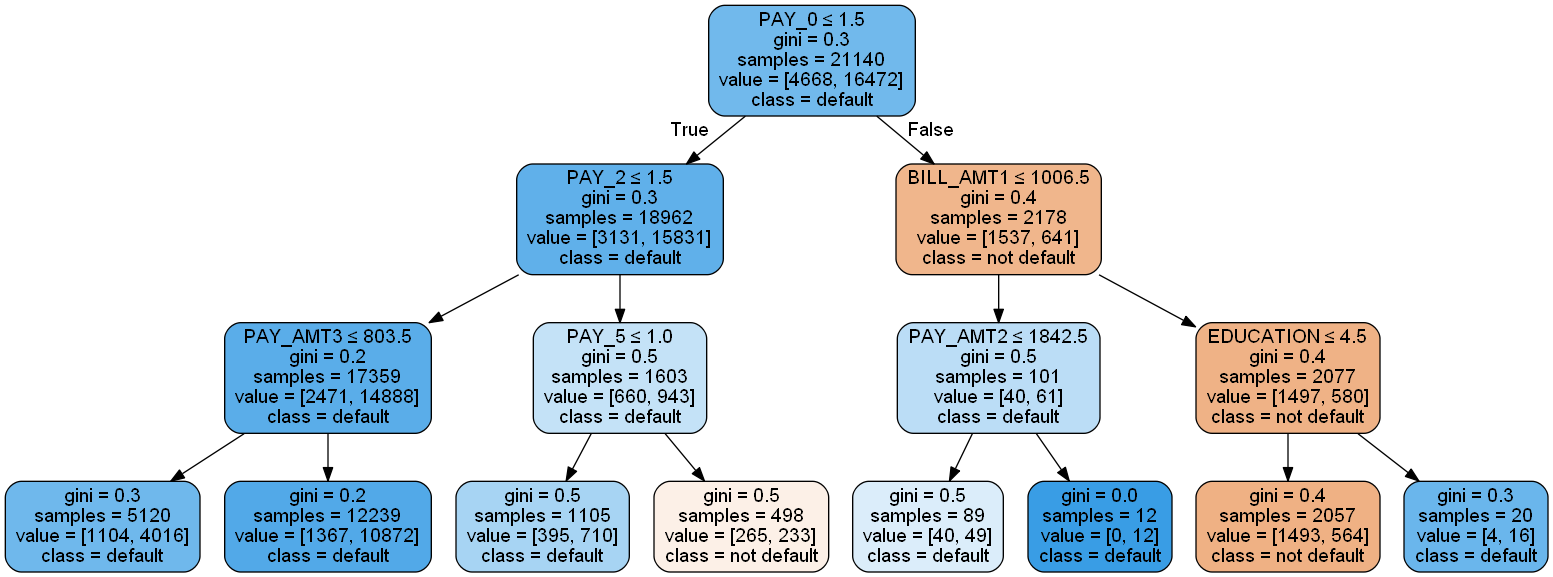

In [107]:
# model with max_depth=3
dot_data = StringIO()
export_graphviz(dtc_model_2, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=default_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [108]:
algoGBoost = GradientBoostingClassifier() 
model = algoGBoost.fit(X_train,y_train)

In [109]:
#Predictions
preds = algoGBoost.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.36      0.47      2014
           1       0.84      0.95      0.89      7047

    accuracy                           0.82      9061
   macro avg       0.75      0.65      0.68      9061
weighted avg       0.80      0.82      0.80      9061



In [110]:
algoRForest = RandomForestClassifier() 
model = algoRForest.fit(X_train,y_train)
#Predictions
preds = algoRForest.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.38      0.47      2014
           1       0.84      0.94      0.89      7047

    accuracy                           0.81      9061
   macro avg       0.73      0.66      0.68      9061
weighted avg       0.79      0.81      0.79      9061



In [111]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [112]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [113]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8158008012979702
Gradient Boosting Classifier 0.8206019668222906
Decision Tree Classifier 0.7260355617363663


In [114]:
#classification using the biographic values
#modelling using all values
#features set to integer values before decision tree checks
X = Credit4.iloc[:,2:7]
print('Summary of feature sample')
X.head()


Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,2,2,1,24
1,120000,2,2,2,26
2,90000,2,2,2,34
3,50000,2,2,1,37
4,50000,1,2,1,57


In [115]:
y=Credit4['default payment next month']
y

0        0
1        0
2        1
3        1
4        1
        ..
30196    1
30197    1
30198    0
30199    0
30200    0
Name: default payment next month, Length: 30201, dtype: int64

In [116]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [117]:
#Modeling (Classification)
algoDtree = DecisionTreeClassifier(max_depth=3)
dtc_model = algoDtree.fit(X_train,y_train)

In [118]:
#Predictions
preds = dtc_model.predict(X_test)

In [119]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2014
           1       0.78      1.00      0.87      7047

    accuracy                           0.78      9061
   macro avg       0.39      0.50      0.44      9061
weighted avg       0.60      0.78      0.68      9061



C:\Users\deepa.DESKTOP-7GPJDE3\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
default_values = ['not default','default'] #this is just a list specifying the default values
dtc_model_2 = algoDtree.fit(X_train,y_train)

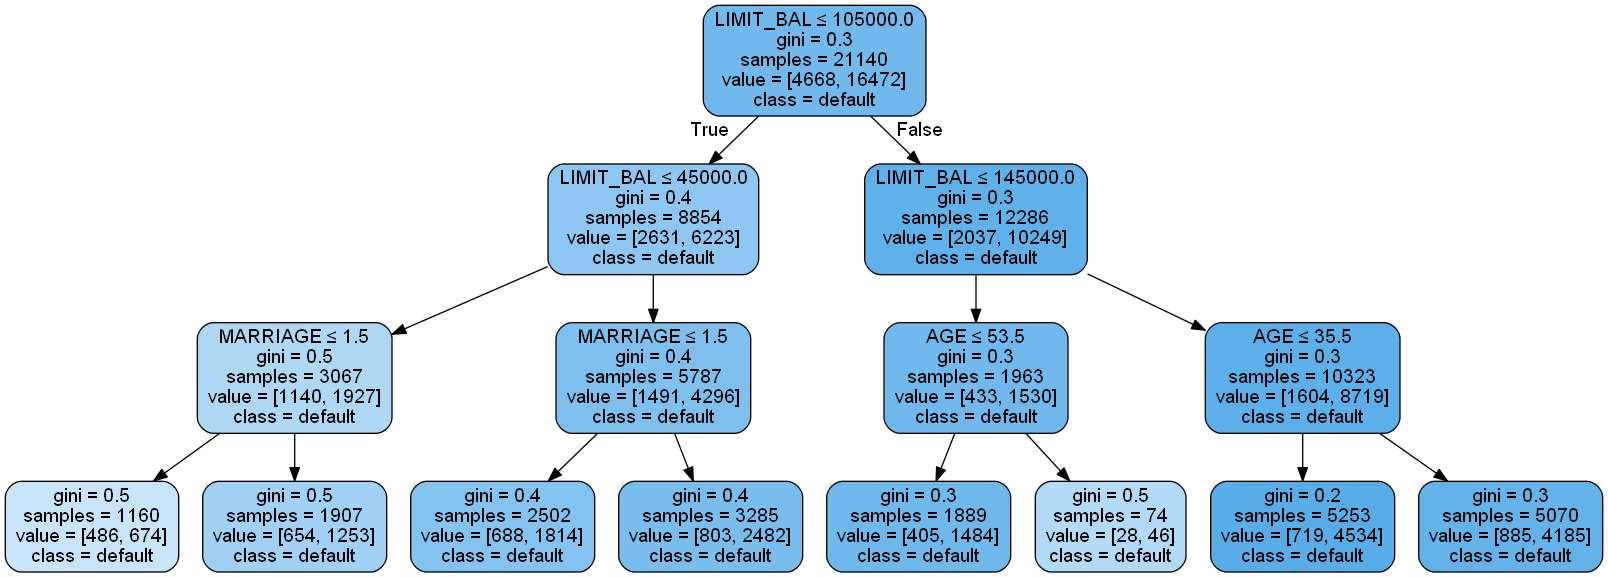

In [121]:
# model with max_depth=3
dot_data = StringIO()
export_graphviz(dtc_model_2, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    class_names=default_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())